In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configure character display
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# Define column names
cols = ['label'] + [f'I{i}' for i in range(1, 14)] + [f'C{i}' for i in range(1, 27)]

num_features = [f'I{i}' for i in range(1, 14)]  # Numerical features

# Load data (first 10,000 rows)
data = pd.read_csv('../../data/raw/train.txt', sep='\t', header=None, names=cols, nrows=10000)

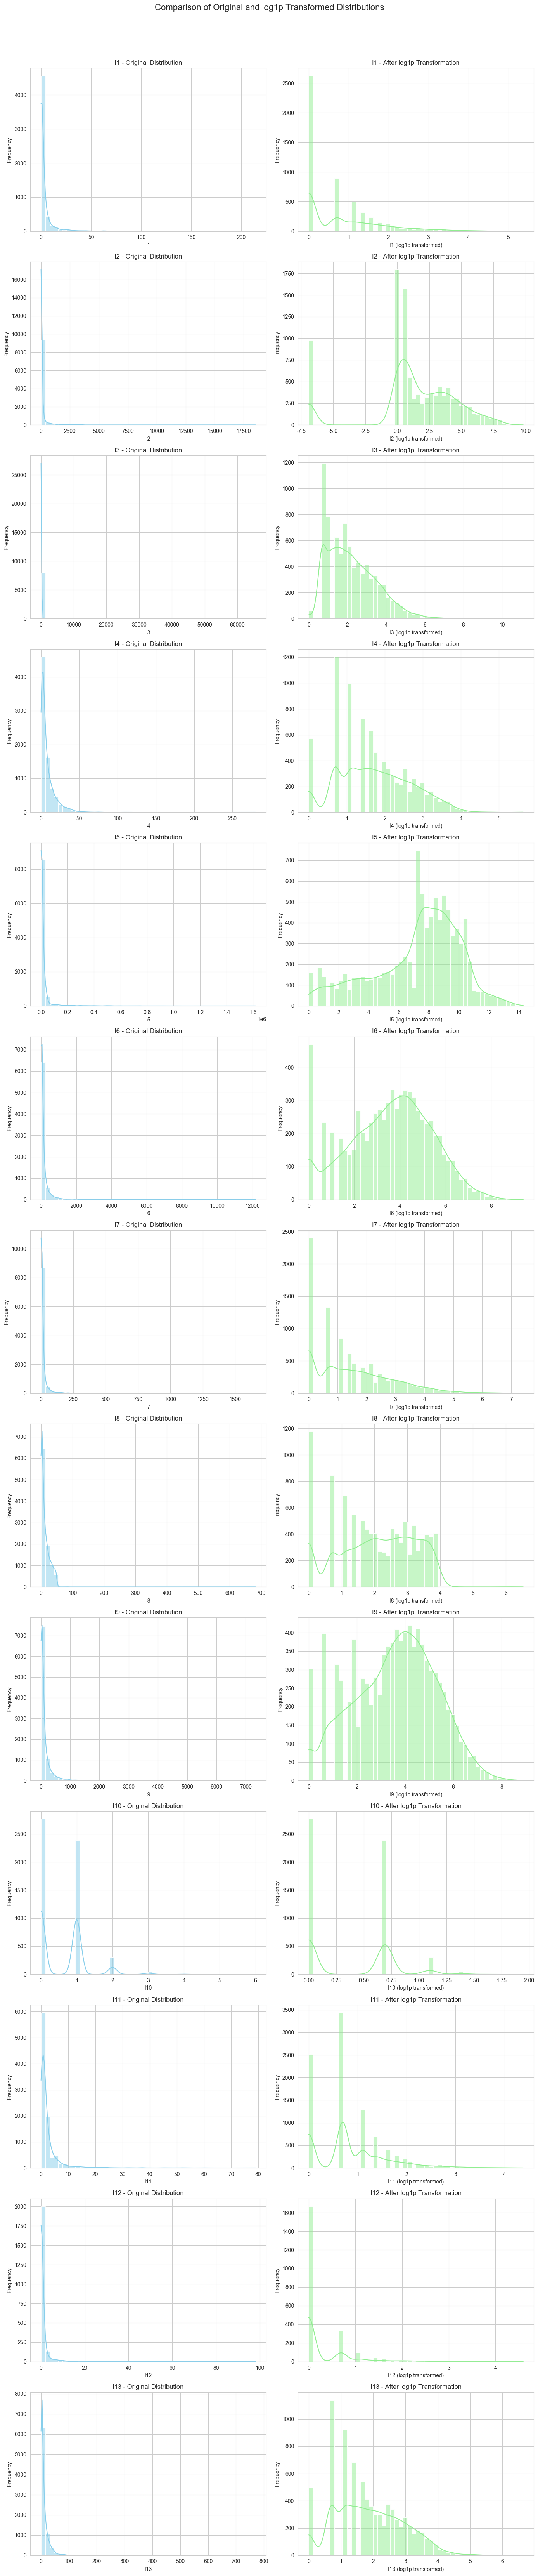

log1p Transformation Explanation:
 1. Suitable for right-skewed (long-tailed) distributed features:
    - Effectively compresses large values
    - Makes distributions closer to normal distribution
 2. Advantage over direct log transformation:
    - log1p(x) = log(x+1) can handle x=0 cases
    - Avoids mathematical errors from log(0)
 3. Limitations:
    - May not work well for features with many negative values
    - Alternative transformation methods should be considered in such cases


In [8]:
# Numeric feature distribution analysis and log1p transformation effect comparison

# Create comparison plots for original and log1p transformed distributions of each numeric feature
# Calculate required subplots: 2 columns per row, total of len(num_features) groups
# Set figure size to ensure sufficient space for each feature's plots
fig, axes = plt.subplots(len(num_features), 2, figsize=(14, 5 * len(num_features)))

# Iterate through each numeric feature and create comparison plots
for i, feature in enumerate(num_features):
    # Extract feature data, excluding missing values
    feature_data = data[feature].dropna()

    # First column: Original distribution histogram
    sns.histplot(
        data=feature_data,
        bins=50,
        ax=axes[i, 0],
        kde=True,  # Show kernel density curve
        color='skyblue'
    )
    axes[i, 0].set_title(f'{feature} - Original Distribution', fontsize=12)
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel('Frequency')

    # Process log1p transformation:
    # 1. Ensure data is greater than -1 (log1p requires x > -1)
    # 2. Use clip function to limit minimum value to -0.999, avoiding issues with log1p(0) or negative values
    clipped_data = feature_data.clip(lower=-0.999)
    # 3. Apply log1p transformation (log1p(x) = log(x + 1))
    transformed_data = np.log1p(clipped_data)

    # Second column: Distribution histogram after log1p transformation
    sns.histplot(
        data=transformed_data,
        bins=50,
        ax=axes[i, 1],
        kde=True,  # Show kernel density curve
        color='lightgreen'
    )
    axes[i, 1].set_title(f'{feature} - After log1p Transformation', fontsize=12)
    axes[i, 1].set_xlabel(f'{feature} (log1p transformed)')
    axes[i, 1].set_ylabel('Frequency')

# Adjust overall layout to prevent overlapping titles and labels
plt.tight_layout()
plt.suptitle('Comparison of Original and log1p Transformed Distributions', fontsize=16, y=1.02)
plt.show()

# Additional explanation: Applicable scenarios for log1p transformation
# Using ANSI escape codes for bold text (works in most terminals)
BOLD = '\033[1m'
END_BOLD = '\033[0m'

print(f"{BOLD}log1p Transformation Explanation:{END_BOLD}")
print(" 1. Suitable for right-skewed (long-tailed) distributed features:")
print("    - Effectively compresses large values")
print("    - Makes distributions closer to normal distribution")
print(" 2. Advantage over direct log transformation:")
print("    - log1p(x) = log(x+1) can handle x=0 cases")
print("    - Avoids mathematical errors from log(0)")
print(" 3. Limitations:")
print("    - May not work well for features with many negative values")
print("    - Alternative transformation methods should be considered in such cases")
    